## EXERCISE 6.5 ##

# CONTENTS # 
#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering


# 1. Importing libraries and data and renaming columns

# IMPORT LIBRARIES

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

In [30]:
%matplotlib inline

# Create a path to main folder

In [31]:
path =r'C:\Users\João Pedro\EXERCISES EXAMPLE PYTHON\World Happiness Report'

In [32]:
path

'C:\\Users\\João Pedro\\EXERCISES EXAMPLE PYTHON\\World Happiness Report'

# IMPORT DATA

In [33]:
df_report = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'merged_years.csv'), sep=';' , index_col = False)

In [34]:
df_report.head()

,Country,Year,Happiness_Rank,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity,Region,Dystopia Residual,Standard Error,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low
0,Switzerland,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,Western Europe,2.51738,0.03411,NaN,NaN,NaN,NaN
1,Iceland,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,Western Europe,2.70201,0.04884,NaN,NaN,NaN,NaN
2,Denmark,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,Western Europe,2.49204,0.03328,NaN,NaN,NaN,NaN
3,Norway,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,Western Europe,2.46531,0.03880,NaN,NaN,NaN,NaN
4,Canada,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,North America,2.45176,0.03553,NaN,NaN,NaN,NaN


In [35]:
df_report.count()

Country                      782
Year                         782
Happiness_Rank               782
Happiness_Score              782
GDP_Capita                   782
Family                       782
Life_Expectancy              782
Freedom                      782
Gov_Trust                    781
Generosity                   782
Region                       315
Dystopia Residual            470
Standard Error               158
Lower Confidence Interval    157
Upper Confidence Interval    157
Whisker.high                 155
Whisker.low                  155
dtype: int64

In [36]:
df_report.shape

(782, 17)

In [37]:
df_report.columns

Index(['Country', 'Year', 'Happiness_Rank', 'Happiness_Score', 'GDP_Capita',
       'Family', 'Life_Expectancy', 'Freedom', 'Gov_Trust', 'Generosity',
       'Region', 'Dystopia Residual', 'Standard Error',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Whisker.high', 'Whisker.low'],
      dtype='object')

# Create a subset which contains only the 'Happiness_Score' and indicators

In [38]:
report_sub = df_report[['Happiness_Score', 'GDP_Capita', 'Family', 'Life_Expectancy', 'Freedom', 'Gov_Trust', 'Generosity']]

In [39]:
report_sub

,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
777,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


In [40]:
report_sub.isnull().sum()

Happiness_Score    0
GDP_Capita         0
Family             0
Life_Expectancy    0
Freedom            0
Gov_Trust          1
Generosity         0
dtype: int64

# CLEAN N/A ENTRY COLUMN

In [41]:
report_sub_clean= report_sub.dropna(subset=['Gov_Trust'])

# CHECK RESULT 

In [42]:
report_sub_clean

,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
777,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700
778,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600
779,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800
780,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500


In [61]:
report_sub_clean.to_csv(r'C:\Users\João Pedro\EXERCISES EXAMPLE PYTHON\World Happiness Report\02 Data\Prepared Data\report_sub_clean.csv')

#### 2. The elbow technique

# Define the range of potential clusters in the data

In [43]:
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above

In [44]:
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

# Create a score that represents a rate of variation for the given cluster option

In [45]:
score = [kmeans[i].fit(report_sub_clean).score(report_sub_clean) for i in range(len(kmeans))] 

score

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


[-1290.5537117644442,
 -487.63686206846637,
 -305.9918365641661,
 -236.56004286622445,
 -193.6221338927258,
 -176.17363825079298,
 -161.9411925561828,
 -150.9348371430779,
 -144.28905192280592]

# Plot the elbow curve

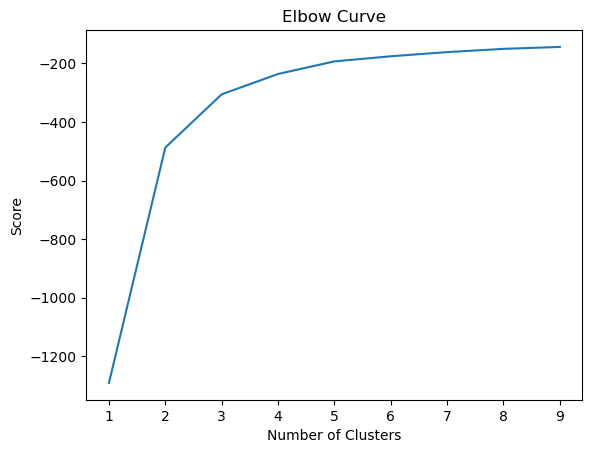

In [46]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# The elbow, representing the point where the curve starts to flatten, occurs at the transition from two to three on the X-axis. Subsequently, there's a slight increase after three. Hence, I conclude that the optimal number of clusters is three. #

### 03. k-means clustering

# Create the k-means object with 3 clusters

In [47]:
kmeans = KMeans(n_clusters = 3 ) 

# Fit the k-means object to the data.

In [48]:
kmeans.fit(report_sub_clean)

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=3)

In [49]:
report_sub_clean['clusters'] = kmeans.fit_predict(report_sub_clean)

C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_50996\3533881495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_sub_clean['clusters'] = kmeans.fit_predict(report_sub_clean)


In [50]:
report_sub_clean.head()

,Happiness_Score,GDP_Capita,Family,Life_Expectancy,Freedom,Gov_Trust,Generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2


In [51]:
report_sub_clean['clusters'].value_counts()

clusters
0    309
1    278
2    194
Name: count, dtype: int64

# Scatterplots

# Plot the clusters for the "Happiness_Score" and "GDP_Capita" variables

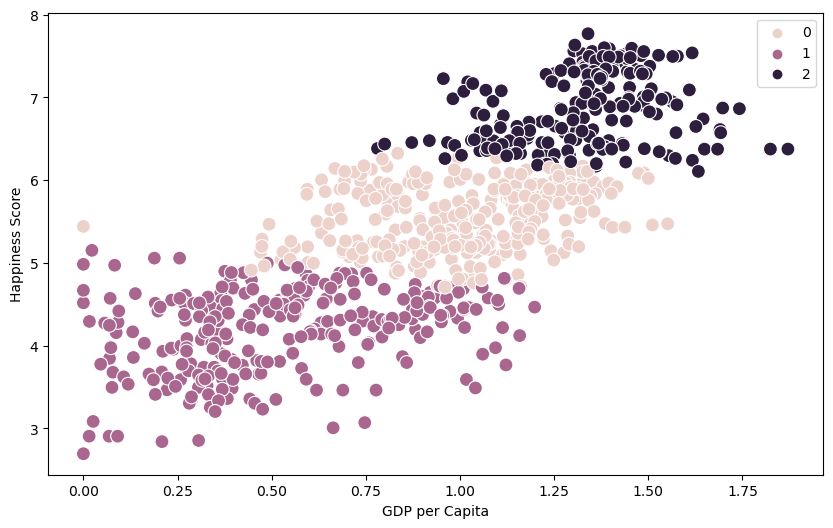

In [52]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x = report_sub_clean['GDP_Capita'], y = report_sub_clean['Happiness_Score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

# Plot the clusters for the "Happiness_Score" and "Family" variables


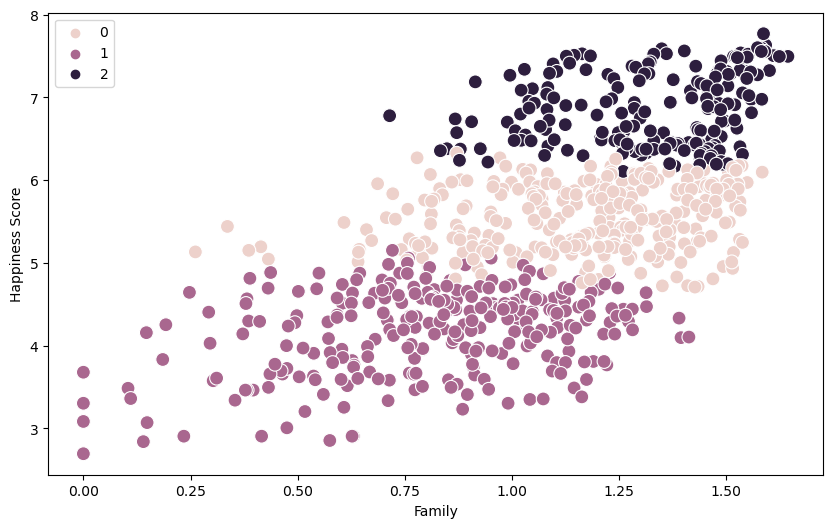

In [53]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x = report_sub_clean['Family'], y = report_sub_clean['Happiness_Score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Family')
plt.ylabel('Happiness Score')
plt.show()

# Plot the clusters for the "Happiness_Score" and "Life_Expectancy" variables.

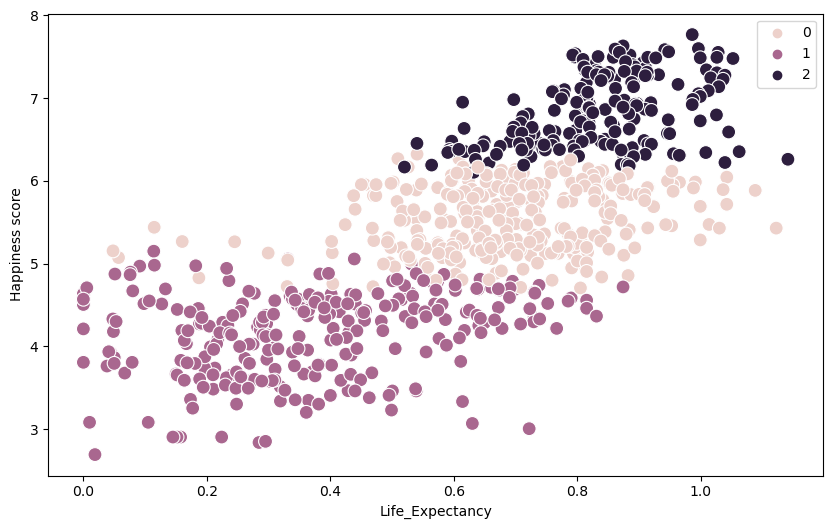

In [54]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x = report_sub_clean['Life_Expectancy'], y = report_sub_clean['Happiness_Score'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Life_Expectancy')
plt.ylabel('Happiness score')
plt.show()

# CONCLUSIONS 

# The results indicate that the purple cluster typically exhibits the highest levels of GDP per capita, family support, health, and happiness scores, followed by the pink cluster. Conversely, the dark cluster tends to demonstrate lower levels across these indicators. These clusters delineate varying degrees of economic development and well-being, with the purple cluster portraying the highest prosperity and happiness, and the dark cluster depicting the lowest. #

### Descriptive Statistics 

In [55]:
report_sub_clean.loc[report_sub_clean['clusters'] == 2, 'cluster'] = 'dark'
report_sub_clean.loc[report_sub_clean['clusters'] == 1, 'cluster'] = 'purple'
report_sub_clean.loc[report_sub_clean['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_50996\62083496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  report_sub_clean.loc[report_sub_clean['clusters'] == 2, 'cluster'] = 'dark'


In [56]:
report_sub_clean.groupby('cluster').agg({'GDP_Capita':['mean', 'median'], 
                         'Family':['mean', 'median'], 
                         'Life_Expectancy':['mean', 'median'],
                          'Happiness_Score':['mean', 'median']})

GDP_Capita              Family           Life_Expectancy            \
              mean    median      mean    median            mean    median   
cluster                                                                      
dark      1.330712  1.343140  1.322725  1.368500        0.833825  0.838177   
pink      1.009366  1.025640  1.165277  1.209000        0.685302  0.685000   
purple    0.518708  0.471775  0.812401  0.847915        0.376685  0.359870   

        Happiness_Score          
                   mean  median  
cluster                          
dark           6.853222  6.8525  
pink           5.538217  5.5250  
purple         4.168288  4.2860

# CONCLUSIONS

## From these statistics, it seems that the Pink Cluster stands out as the most consistently balanced overall, with minimal deviations between the mean and median values across all indicators. The Purple Cluster shows slightly larger disparities, suggesting a slightly higher variability within these clusters for certain indicators. In contrast, the Dark Cluster appears to be the most diverse and inconsistent. ##

 ## What could these results be useful for? ##

## The variability within clusters serves as a valuable tool for anomaly detection. Significant deviations of certain data points from a cluster's mean or median may indicate unusual cases warranting further investigation, prompting additional analysis and hypothesis formulation. Such findings contribute to a better understanding of each cluster's characteristics. In social or public policy contexts, discerning cluster differences can inform targeted investments, interventions, or support efforts. In business and marketing, organizations can leverage these insights to make critical decisions regarding company expansion, product development, and resource allocation. Moreover, monitoring changes over time within these clusters facilitates comparisons to assess whether countries or regions within each cluster are improving or deteriorating across key areas such as health, family support, economic conditions, or overall happiness. 
Overall, the outcomes of cluster analysis serve as a foundational element for a diverse array of applications and decision-making processes across various domains, including business, marketing, public policy, and healthcar## e.